## Machine Learning Course Feedback Analysis

*Prepared by:*  
**Jude Michael Teves**  
Faculty, Software Technology Department  
College of Computer Studies - De La Salle University

The term has just ended and I just got feedback from my students, who are mostly senior undergraduate Computer Science students, in the Machine Learning course I'm teaching. It was definitely a challenging course to teach as the field of Machine Learning is rapidly evolving and it has many prerequisites such as calculus, linear algebra, statistics, and programming, among others. In addition, I attempted to teach this course without skipping the nitty-gritty mathematics and implementation from scratch of some of the core algorithms we use today. Practical aspects and advanced techniques in Machine Learning  were taught as a response to how they conducted their homework and projects as a 1-term course would not be enough to discuss the intricacies of many of the techniques that we use. I believe it is one way of differentiating this with most resources nowadays so that the students won't think this is something they could have simply 'Googled'. Anyway, I think this a good time to reflect on what happened throughout this course, and what better way to do this than using Machine Learning on the feedback I have received? Machine Learning-ception XD.

## Preliminaries

### Import Packages

<!-- Version requirements:
- seaborn >= 0.11 -->

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

import seaborn as sns

from itertools import chain

%matplotlib inline

sns.set_style('darkgrid')

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
print(sns.__version__)

0.9.0


In [3]:
FILENAME = "Course Evaluation.csv"

### Read Dataset

We rename the columns first as they are too long and convert the ratings that are currently in text form into 1-5 scale for easing processing later. Note that for the following columns: 'course_rating', 'course_learning', 'instructor_knowledge', 'skill_start', 'skill_end', 'effort', and 'learning_contribution', the ratings are as follows:
- Excellent - 5
- Very good - 4
- Satisfactory - 3
- Fair - 2
- Poor - 1

And for the following columns: 'effective_lecturer', 'clear_presentations', 'stimulated_interest', 'effective_time', 'helpful', 'useful_feedback', 'clear_objectives', 'organized_content', 'appropriate_workload', and 'allow_participation', the ratings are as follows:
- Strongly agree - 5
- Agree - 4
- Neutral - 3
- Disagree - 2
- Strongly Disagree - 1

Both are actually rating systems found in Google Form's evaluation template, which I simply copied and modified by a bit for this evaluation.

`Additional Info: out of the 36 students, 28 have given their feedback`

In [4]:
df = pd.read_csv(FILENAME)
# df.columns = ['timestamp', 'course_rating', 'course_learning', 'instructor_knowledge', 'skill_start', 'skill_end', 'effort', 'learning_contribution',
#               'effective_lecturer', 'clear_presentations', 'stimulated_interest', 'effective_time', 'helpful', 'useful_feedback', 'clear_objectives', 
#                 'organized_content', 'appropriate_workload', 'allow_participation', 'useful_aspects', 'wishlist', 'final_message']

df.rename(columns = {"Timestamp": "timestamp", 
           "How would you rate the course?": "course_rating",
           "Did you learn many things in this course?": "course_learning",
           "Rate the instructor's knowledge in this field": "instructor_knowledge",
           "Contribution to learning [Level of skill/knowledge at start of course]": "skill_start",
           "Contribution to learning [Level of skill/knowledge at end of course]": "skill_end",
           "Contribution to learning [Level of skill/knowledge required to complete the course]": "effort",
           "Contribution to learning [Contribution of course to your skill/knowledge]": "learning_contribution",
           "Skill and responsiveness of the instructor [Instructor was an effective lecturer/demonstrator]": "effective_lecturer",
           "Skill and responsiveness of the instructor [Presentations were clear and organized]": "clear_presentations",
           "Skill and responsiveness of the instructor [Instructor stimulated student interest]": "stimulated_interest",
           "Skill and responsiveness of the instructor [Instructor effectively used time during class periods]": "effective_time",
           "Skill and responsiveness of the instructor [Instructor was available and helpful]": "helpful",
           "Skill and responsiveness of the instructor [Grading was prompt and had useful feedback]": "useful_feedback",
           "Course content [Learning objectives were clear]": "clear_objectives",
           "Course content [Course content was organized and well planned]": "organized_content",
           "Course content [Course workload was appropriate]": "appropriate_workload",
           "Course content [Course organized to allow all students to participate fully]": "allow_participation",
           "What aspects of this course were most useful or valuable?" :"useful_aspects",
           "How would you improve this course (Wishlist)? ": "wishlist",
           "Any final message to me?": "final_message"}, inplace=True)

cols = ['course_rating', 'course_learning', 'instructor_knowledge', 'skill_start', 'skill_end', 'effort', 'learning_contribution']
df[cols] = df[cols].replace({'Excellent': 5,
                             'Very good': 4,
                             'Satisfactory': 3,
                             'Fair': 2,
                             'Poor': 1})

cols = ['effective_lecturer', 'clear_presentations', 'stimulated_interest', 'effective_time', 'helpful', 'useful_feedback', 
        'clear_objectives', 'organized_content', 'appropriate_workload', 'allow_participation']
df[cols] = df[cols].replace({'Strongly agree': 5,
                             'Agree': 4,
                             'Neutral': 3,
                             'Disagree': 2,
                             'Strongly disagree': 1})

df.head()

,timestamp,course_rating,course_learning,instructor_knowledge,skill_start,skill_end,effort,learning_contribution,effective_lecturer,clear_presentations,...,effective_time,helpful,useful_feedback,clear_objectives,organized_content,appropriate_workload,allow_participation,useful_aspects,wishlist,final_message
0,2021/02/09 7:26:23 PM GMT+8,5,4,5,1,4,3,4,5,5,...,4,5,5,4,4,5,4,Learning about machine learning such as the pr...,None,Thank you for the term sir!
1,2021/02/09 7:26:30 PM GMT+8,4,4,4,2,3,3,4,5,4,...,5,5,5,4,4,5,5,Probably the fact that it cleared things up ab...,Probably have more time dedicated to activitie...,Thank you sir for being patient with us and do...
2,2021/02/09 7:28:02 PM GMT+8,4,5,5,2,3,2,3,4,5,...,3,5,5,5,5,4,5,It was really helpful to dive into the objecti...,A heads up on what previous lessons could be a...,Sir would there be any way for us to contact y...
3,2021/02/09 7:28:56 PM GMT+8,4,4,4,2,3,3,4,4,4,...,4,4,4,4,4,4,4,home works,NaN,thank you for the term
4,2021/02/09 7:29:42 PM GMT+8,4,5,4,1,3,4,4,4,4,...,4,5,4,4,3,4,4,Learning on how the machine learning pipeline ...,NaN,Thank you sir for teaching us the entire term!...


## Exploratory Data Analysis

### High-level course, Instructor knowledge, and Learning contribution ratings

Here we show some descriptive statistics on those features/columns.

In [5]:
cols = ['course_rating', 'course_learning', 'instructor_knowledge']
df[cols].describe().loc[['count', 'mean', 'std']]

,course_rating,course_learning,instructor_knowledge
count,28.000000,28.000000,28.000000
mean,4.285714,4.571429,4.857143
std,0.534522,0.503953,0.356348


In [6]:
cols = ['skill_start', 'skill_end', 'effort', 'learning_contribution']
df[cols].describe().loc[['count', 'mean', 'std']]

,skill_start,skill_end,effort,learning_contribution
count,28.000000,28.000000,28.000000,28.000000
mean,2.285714,3.714286,3.714286,4.142857
std,1.272418,0.854493,0.762896,0.755929


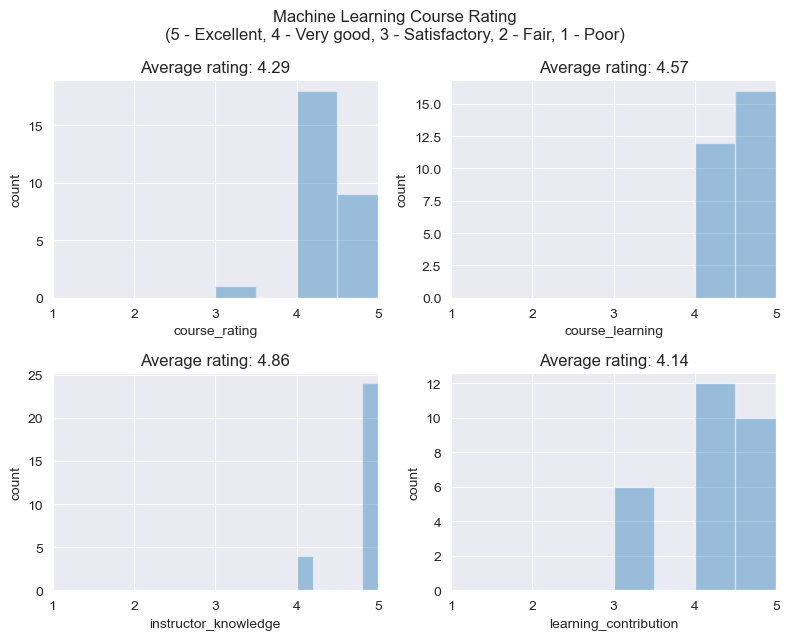

In [7]:
nrows, ncols = (2, 2)
fig, ax = plt.subplots(nrows, ncols, figsize=(8, 6), dpi=100)

cols = ['course_rating', 'course_learning', 'instructor_knowledge', 'learning_contribution']

for curr_ax, col in zip(list(chain(*ax)), cols):
    sns.distplot(df[col], kde=False, ax=curr_ax)
    curr_ax.set_xlim(1, 5)
    curr_ax.set_ylabel('count')
    curr_ax.set_title(f"Average rating: {df[col].mean():.2f}")

figure_title = 'Machine Learning Course Rating\n(5 - Excellent, 4 - Very good, 3 - Satisfactory, 2 - Fair, 1 - Poor)'
plt.suptitle(figure_title, y=1.06)
plt.tight_layout()
plt.show()


As can be seen in the graphs above, students generally have great feedback for this course. The highest here is the `instructor_knowledge` feature.

### Perceived improvement in skill throughout the term

In hindsight, I realized that the `Contribution to learning [Level of skill/knowledge at start of course` and `Contribution to learning [Level of skill/knowledge at end of course]` , which are default questions I got from Google Forms, are ambiguous. Some might interpret the former to be the students' skill level prior to starting the course, some might interpret it as the learnings that they got from me in the first few sessions of this course. I was initially thinking of the former. I realized the ambiguity when I saw some feedback having `Excellent` marks on both items. To give context, the class has little to no ML background prior to this course. Thus, the results of statistical test below will be a more conservative estimate of the perceived improvement of the students.

Let's first look at the change in average perceived skill.

In [8]:
cols = ['skill_start', 'skill_end']
df[cols].describe().loc[['count', 'mean', 'std']]

,skill_start,skill_end
count,28.000000,28.000000
mean,2.285714,3.714286
std,1.272418,0.854493


Note that the rating system for the features of interest here are the following:
- Excellent - 5
- Very good - 4
- Satisfactory - 3
- Fair - 2
- Poor - 1

It seems like there is a noticeable increase in skill, but let's compare if they are truly statistically significant. We will be using Wilcoxon signed-ranked test as it is non-parametric, which is suited for ordinal data, and because our data comes from the same group. Our hypothesis is that there is an increase in skill. Let's set our alpha value to 0.05 ($\alpha = 0.05$). We then reject the null hypothesis (no change) if the p-value we get is lower than that.

In [9]:
from scipy.stats import wilcoxon

wilcoxon(df['skill_start'], df['skill_end'])

WilcoxonResult(statistic=6.0, pvalue=1.6267401626169193e-05)

In [10]:
alpha = 0.05
test_statistic, p = wilcoxon(df['skill_start'], df['skill_end'])

if p > alpha:
    print("Null hypothesis: No change in the distribution.")
else:
    print("Alternative hypothesis: There is a noticeable change in the distribution.")

Alternative hypothesis: There is a noticeable change in the distribution.


We got 2.29 for the initial skill level and 3.71 for the final skill level. As the statistical test shows, the students' perceived skill did improve throughout the term. The final skill level should not be confused with the 4.14 in the `learning_contribution` as the students may have learned a lot but they might still feel that they have much to learn, which is something that I expect as the field of Machine Learning/Artificial Intelligence is very big.

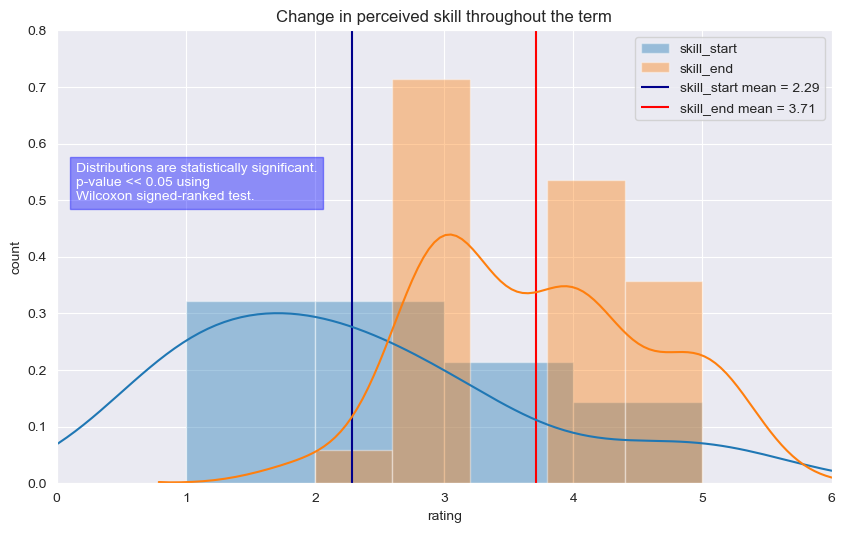

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,6), dpi=100)
sns.distplot(df['skill_start'], ax=ax, label='skill_start')
sns.distplot(df['skill_end'], ax=ax, label='skill_end')
plt.ylabel('count')
plt.xlabel('rating')
plt.xlim(0, 6)
plt.ylim(0, 0.8)

plt.vlines(df['skill_start'].mean(), ymin=0, ymax=1, colors='darkblue', linestyles='solid', label=f"skill_start mean = {df['skill_start'].mean():.2f}")
plt.vlines(df['skill_end'].mean(), ymin=0, ymax=1, colors='red', linestyles='solid', label=f"skill_end mean = {df['skill_end'].mean():.2f}")
           
t = plt.text(0.15, 0.5, f'Distributions are statistically significant.\np-value << 0.05 using \nWilcoxon signed-ranked test.', c='white')
t.set_bbox(dict(facecolor='blue', alpha=0.4, edgecolor='blue'))
           
plt.title('Change in perceived skill throughout the term')
plt.legend()
plt.show()

### Instructor-specific ratings

For the following features, we use a different ranking system compared to the ones before.
- Strongly agree - 5
- Agree - 4
- Neutral - 3
- Disagree - 2
- Strongly Disagree - 1


In [12]:
cols = ['effective_lecturer', 'clear_presentations', 'stimulated_interest', 'effective_time', 'helpful', 'useful_feedback', 
        'clear_objectives', 'organized_content', 'appropriate_workload', 'allow_participation']
df[cols].describe().loc[['count', 'mean', 'std']]

,effective_lecturer,clear_presentations,stimulated_interest,effective_time,helpful,useful_feedback,clear_objectives,organized_content,appropriate_workload,allow_participation
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,4.357143,4.321429,4.107143,4.428571,4.857143,4.607143,4.392857,4.428571,4.607143,4.428571
std,0.678467,0.669636,0.831745,0.690066,0.356348,0.566947,0.685257,0.572750,0.497347,0.634126


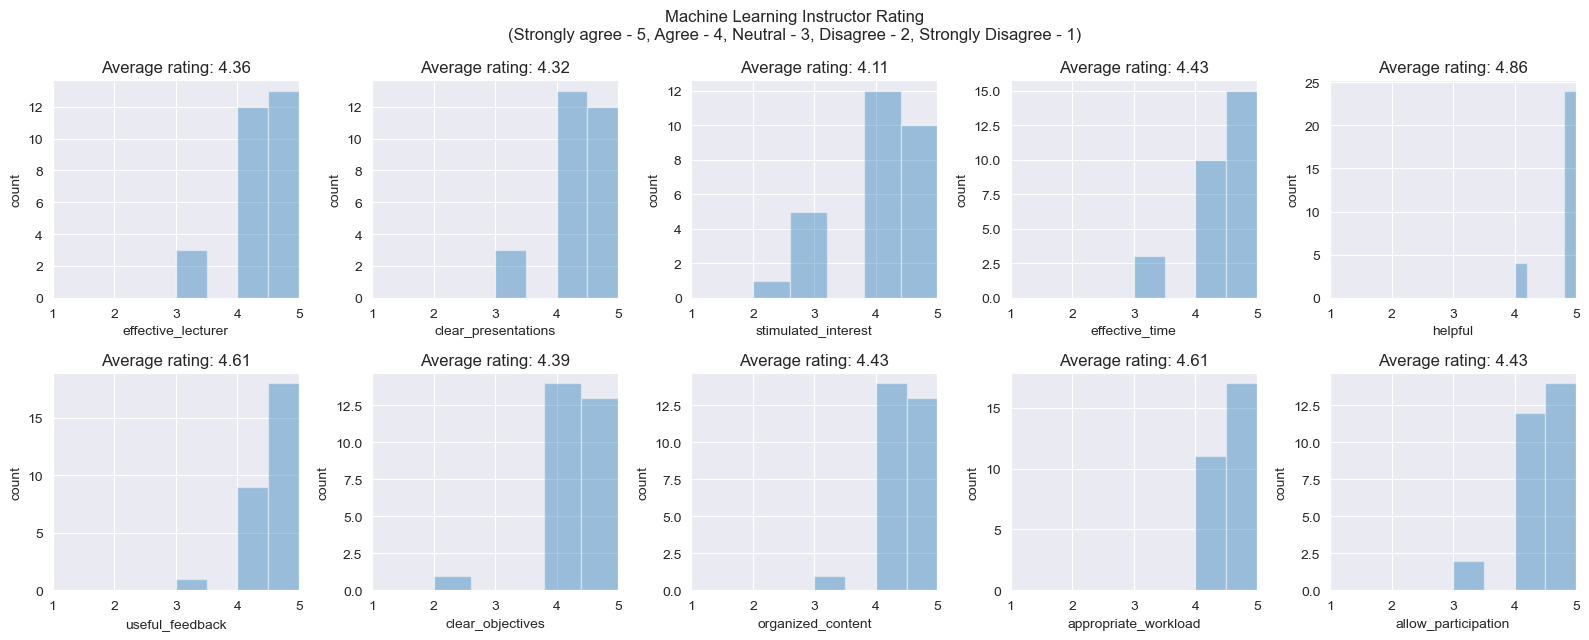

In [13]:
nrows, ncols = (2, 5)
fig, ax = plt.subplots(nrows, ncols, figsize=(16, 6), dpi=100)

cols = ['effective_lecturer', 'clear_presentations', 'stimulated_interest', 'effective_time', 'helpful', 'useful_feedback', 
        'clear_objectives', 'organized_content', 'appropriate_workload', 'allow_participation']

for curr_ax, col in zip(list(chain(*ax)), cols):
    sns.distplot(df[col], kde=False, ax=curr_ax)
    curr_ax.set_xlim(1, 5)
    curr_ax.set_ylabel('count')
    curr_ax.set_title(f"Average rating: {df[col].mean():.2f}")

figure_title = 'Machine Learning Instructor Rating\n(Strongly agree - 5, Agree - 4, Neutral - 3, Disagree - 2, Strongly Disagree - 1)'
plt.suptitle(figure_title, y=1.06)
plt.tight_layout()
plt.show()

Similar with the other ratings above, the students have good ratings here. The highest here are `helpful`, `useful_feedback`, and `appropriate_workload` features.

## Topic Modeling on the students' comments

In this section, we will be clustering the students' responses to different questions. The methodology for the clustering below is inspired by this <a href="https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/">article</a>.


We will also need to run the following in the command line since this is one of the dependencies of spacy functions we will be using later.
```
python -m spacy download en_core_web_sm
```

In [14]:
import re, nltk, spacy, string

In [15]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import pyLDAvis.gensim
import pyLDAvis

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [16]:
df_comments = df[['useful_aspects', 'wishlist', 'final_message']]
df_comments.head(10)

,useful_aspects,wishlist,final_message
0,Learning about machine learning such as the pr...,None,Thank you for the term sir!
1,Probably the fact that it cleared things up ab...,Probably have more time dedicated to activitie...,Thank you sir for being patient with us and do...
2,It was really helpful to dive into the objecti...,A heads up on what previous lessons could be a...,Sir would there be any way for us to contact y...
3,home works,NaN,thank you for the term
4,Learning on how the machine learning pipeline ...,NaN,Thank you sir for teaching us the entire term!...
5,Learning how to do proper machine learning tec...,NaN,Thank you sir for the wonderful term. Sorry if...
6,NaN,NaN,NaN
7,NaN,NaN,Thank you Sir for your patience with us and ma...
8,cooperative work,NaN,Thank you for this term po sir!
9,I think the most valuable aspect of the course...,If I were to name a few things that can be imp...,"Hi, Sir!! Thank you very much for being our pr..."


### Preprocessing

#### Text Cleaning and Normalization

Before we do the actual modeling, we first need to preprocess the data. Since this is a text data, we have to clean it first and also perform normalization, which in this case is lemmatization.

In [17]:
def clean_text(text:str) -> str:
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

# nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')
# def lemmatizer(text:str) -> str:        
#     sent = []
#     doc = nlp(text)
#     for word in doc:
#         sent.append(word.lemma_)
#     return " ".join(sent)

def make_bigrams(texts:list) -> list:
    bigram = gensim.models.Phrases(texts, min_count=1, threshold=1) # higher threshold fewer phrases.
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return [bigram_mod[doc] for doc in texts]

def remove_stopwords(texts:list) -> list:
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts:list, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']) -> list:
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#### Vectorization

We apply Bag-of-words (BoW) representation to our text data to turn it into a format understandable by machine learning models. We also include bigrams so that we capture the co-occurrence of words.

Here are the functions for creating our BoW table and the dictionary for topic modeling.

In [18]:
def sent_to_words(sentences:list):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        
def tokenize(docs:list) -> tuple:
    # Tokenization
    comments_tokenized = list(sent_to_words(docs))

    # Remove Stop Words
    comments_tokenized = remove_stopwords(comments_tokenized)

    # Lemmatization
    comments_tokenized = lemmatization(comments_tokenized, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    
    # Include bigrams
    comments_tokenized = make_bigrams(comments_tokenized)
    
    # Create Dictionary
    id2word = corpora.Dictionary(comments_tokenized)

    # Term Document Frequency
    bow = [id2word.doc2bow(text) for text in comments_tokenized]
    
    return comments_tokenized, id2word, bow

In [19]:
def clean_and_normalize_text(comments:list) -> list:
    comments = pd.Series(comments).apply(lambda x: clean_text(x))
#     comments = comments.apply(lambda x: lemmatizer(x))
    # handle spacy's PRON
    comments = comments.str.replace('-PRON-', '') 
        
    return comments.tolist()

### Topic Modeling

In the following sections, we will be using Latent Dirichlet Allocation (LDA) for topic modeling. We could configure so many hyperparameters but for now, we will only be playing around with the number of clusters hyperparameter.

#### Finding optimal number of clusters

Functions for finding optimal number of clusters.

In [20]:
from tqdm import tqdm

def get_coherence(lda_model:gensim.models.ldamodel.LdaModel, texts:list, dictionary:gensim.corpora.dictionary.Dictionary):
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    return coherence_lda

def build_lda_model(num_topics:int, corpus:list, id2word:gensim.corpora.dictionary.Dictionary):
    return gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                   id2word=id2word,
                                                   num_topics=num_topics, 
                                                   random_state=100,
                                                   update_every=1,
                                                   chunksize=100,
                                                   passes=10,
                                                   alpha='auto',
                                                   per_word_topics=True)

def find_k(texts:list, id2word:gensim.corpora.dictionary.Dictionary, bow:list, max_k:int=10) -> pd.DataFrame:
    list_n = []
    list_score = []
    for num_topics in tqdm(range(2, max_k)):
        # Build LDA model
        lda_model = build_lda_model(num_topics, bow, id2word)

        score = get_coherence(lda_model, texts, id2word)
        list_n += [num_topics]
        list_score += [score]
        
    d = np.array([list_n, list_score]).T
    return pd.DataFrame(d, columns=['n_topics', 'score'])

def plot_coherence(df:pd.DataFrame):
    fig, ax = plt.subplots(1,1, figsize=(8,4), dpi=100)
    df.plot(x='n_topics', y='score', ax=ax)
    plt.show()

#### Build model with optimal k

After determining the best k, we choose that model configuration.

In [21]:
def build_optimal_lda(optimal_k:int, texts:list, id2word:gensim.corpora.dictionary.Dictionary, bow:list):
    lda_model = build_lda_model(optimal_k, bow, id2word)
    score = get_coherence(lda_model, texts, id2word)
    print(f'Coherence Score: {score}')

    # Visualize the topics
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow, id2word, mds='tsne', sort_topics=False)
    display(vis)
    # pyLDAvis.save_html(vis, f'{LDA_SAVE_FILE}.html') 
    return lda_model

#### Get most representative comments

We also get the most representative comments per cluster.

In [22]:
def format_topics_sentences(ldamodel, bow, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[bow]):
        row = row[0] # fix
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

def print_representative_documents(sent_topics_sorted, texts:list):
    for topic_no, cluster in sent_topics_sorted.groupby('Topic_Num'):
        print('\n----------')
        print(f'TOPIC {topic_no + 1}')
        print(f"Keywords: {cluster.head(1)['Keywords'].tolist()}\n")
        for index in cluster['Document_No']:
            print(f"Text {index}: {texts[index]}")
            # print(f"Text {index} Keywords: {cluster[cluster['Document_No']==index]['Keywords'].tolist()}")

            
def get_most_representative_documents(comments:list, comments_tokenized:list, lda_model:gensim.models.ldamodel.LdaModel, bow:list) -> pd.DataFrame:
    df_representative_comments = pd.DataFrame(columns=['topic_num','comments'])
    df_topic_sents_keywords = format_topics_sentences(lda_model, bow, comments_tokenized)
    
    # Format
    df_dominant_topic = df_topic_sents_keywords.reset_index()
    df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

    # Group top 5 sentences under each topic
    sent_topics_sorted = pd.DataFrame()
    sent_topics_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')
    
    ## Display keywords per cluster
    #display(sent_topics_grpd.head(1)['Topic_Keywords'].tolist())

    for i, grp in sent_topics_grpd:
        grp = grp.reset_index()
        sent_topics_sorted = pd.concat([sent_topics_sorted, grp.sort_values(['Perc_Contribution'], ascending=[0]).head(5)], axis=0)

    # Reset Index    
    sent_topics_sorted.reset_index(drop=True, inplace=True)

    # Format
    sent_topics_sorted.columns = ['Document_No', 'Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]
    
    print_representative_documents(sent_topics_sorted, comments)

    for topic_no, cluster in sent_topics_sorted.groupby('Topic_Num'):
        topic_no = topic_no + 1
        for index in cluster['Document_No']:
            row = [topic_no, f'Comment {index}: {comments[index]}']
            df_representative_comments.loc[df_representative_comments.shape[0]] = row
            
    return df_representative_comments

### Comment Clusters

Now we will be using the functions declared in the previous sections to model the responses to different questions. 

#### Useful aspects of this ML course

In [23]:
comments = df_comments['useful_aspects'].dropna().reset_index(drop=True)
comments_cleaned = clean_and_normalize_text(comments)
comments_tokenized, id2word, bow = tokenize(comments_cleaned)

In [24]:
df_lda_clusters = find_k(comments_tokenized, id2word, bow)
df_lda_clusters

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [02:18<00:00, 17.33s/it]


,n_topics,score
0,2.0,0.419332
1,3.0,0.414496
2,4.0,0.419477
3,5.0,0.385592
4,6.0,0.394426
5,7.0,0.397946
6,8.0,0.417364
7,9.0,0.399313


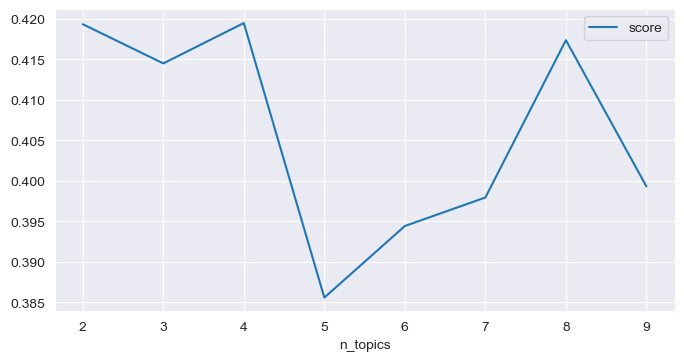

In [25]:
plot_coherence(df_lda_clusters)

<!--
As can be seen in the graph above, we got a noticeable increase in coherence score when `n_topics = 3` then the score starts to quickly decrease after that so let's use it.
-->

As can be seen in the graph above, we got a high coherence score when `n_topics = 2` despite not having too high a cluster count so let's use it.

In [28]:
optimal_k = 2
lda_model = build_optimal_lda(optimal_k, comments_tokenized, id2word, bow)

Coherence Score: 0.4193320909847281


PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
0     -60.312317  141.369629       1        1  66.631882
1      60.312561 -141.369141       2        1  33.368118, topic_info=                Term      Freq     Total Category  logprob  loglift
107              try  2.000000  2.000000  Default  30.0000  30.0000
135             help  2.000000  2.000000  Default  29.0000  29.0000
4           learning  2.000000  2.000000  Default  28.0000  28.0000
106            study  1.000000  1.000000  Default  27.0000  27.0000
102         material  1.000000  1.000000  Default  26.0000  26.0000
..               ...       ...       ...      ...      ...      ...
85            useful  0.809514  4.652800   Topic2  -4.8373  -0.6512
2    learn_different  0.804962  3.253111   Topic2  -4.8430  -0.2990
88               use  0.804715  2.552637   Topic2  -4.8433  -0.0568
94         implement  0.803989  2.552863   Topic2  -4.8442  -0.0578
130             code  0.801966  1.852941   Topic2  -4.8467   0.2601

[123 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
38        1  0.735893   able
97        1  0.419058   also
97        2  0.419058   also
51        1  0.540876  apply
51        2  0.540876  apply
...     ...       ...    ...
87        1  0.991775   well
175       2  0.867579    why
50        1  0.418598   work
50        2  0.418598   work
48        1  0.735573  would

[110 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [29]:
df_representative_comments = get_most_representative_documents(comments, comments_tokenized, lda_model, bow)


----------
TOPIC 1.0
Keywords: ['machine_learn, learn, problem, technique, useful, topic, would, complex, properly, learn_different']

Text 7: I think the most valuable aspect of the course was that it was able to cement a solid foundation of machine learning. Given how big the field is and how we're moving ever-closer to applying machine learning in many different fields, I think the foundations given by the course will definitely be useful and will be a huge skill set in my professional career. Another thing I found very valuable as well was that the course was able to give importance to machine learning and explain different machine learning concepts that seem very daunting and complicated at first. And although this was only an introductory course, the topics and lessons I learned over the term was definitely plenty and has further piqued my interest in the topic.
Text 13: The most useful lesson that I have learned in this course is the high level understanding of the ml technique

Below are my interpretations of the 2 clusters.

Cluster 1:
 - students having a solid foundation of ML
 - ML is a broad/big and complex field
 - learning the proper ML methodology
 
Cluster 2:
 - The exercises, notebooks, and other materials given in class are very helpful
 - learning the proper ML methodology
 
There are still some overlaps but I think this is an acceptable clustering.

#### Wishlist

In [44]:
comments = df_comments['wishlist'].dropna().reset_index(drop=True)
comments_cleaned = clean_and_normalize_text(comments)
comments_tokenized, id2word, bow = tokenize(comments_cleaned)

In [45]:
df_lda_clusters = find_k(comments_tokenized, id2word, bow)
df_lda_clusters

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:42<00:00, 12.79s/it]


,n_topics,score
0,2.0,0.348324
1,3.0,0.323929
2,4.0,0.326174
3,5.0,0.404950
4,6.0,0.390404
5,7.0,0.471545
6,8.0,0.456147
7,9.0,0.517908


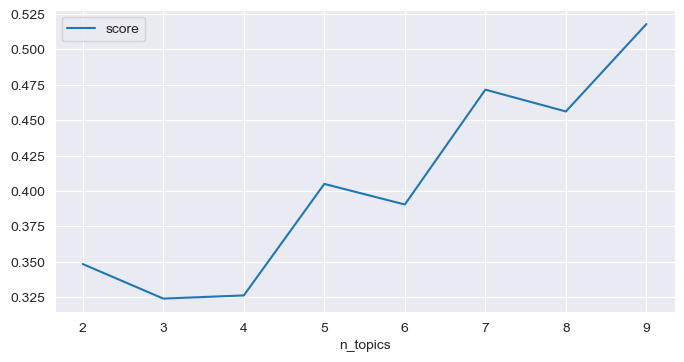

In [46]:
plot_coherence(df_lda_clusters)

<!--
It is quite tricky to choose a good cluster value based on the plot above, but we choose `n_topics = 5` as we got a noticeable increase in coherence score while not having a high cluster count, which we do not want for this dataset as it is too small.
-->

It is quite tricky to choose a good cluster value based on the plot above, but we choose `n_topics = 2` as the coherence score did decrease for the next few succeeding numbers (3 and 4). Ideally we will be choosing `n_topics = 9`, but when I used it, I got many clusters having only one or two items, and the items are even unrelated. Same goes with `n_topics = 5 and 7`.

In [49]:
optimal_k = 2
lda_model = build_optimal_lda(optimal_k, comments_tokenized, id2word, bow)

Coherence Score: 0.3483240089650194


PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
0     -60.312317  141.369629       1        1  36.565636
1      60.312561 -141.369141       2        1  63.434364, topic_info=                 Term      Freq     Total Category  logprob  loglift
84            concept  4.000000  4.000000  Default  30.0000  30.0000
154             slide  1.000000  1.000000  Default  29.0000  29.0000
71               slow  1.000000  1.000000  Default  28.0000  28.0000
64             scheme  1.000000  1.000000  Default  27.0000  27.0000
81       begin_course  1.000000  1.000000  Default  26.0000  26.0000
..                ...       ...       ...      ...      ...      ...
45   machine_learning  0.990893  1.776939   Topic2  -5.0593  -0.1289
9                time  0.989703  1.776698   Topic2  -5.0605  -0.1299
83               code  0.989577  2.301725   Topic2  -5.0606  -0.3890
69              learn  0.989526  1.776661   Topic2  -5.0607  -0.1301
79              apply  0.988746  1.776503   Topic2  -5.0615  -0.1308

[127 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
76        1  0.608520      able
93        2  0.799212  acquaint
1         1  0.573662  activity
1         2  0.573662  activity
26        2  0.799149   algebra
...     ...       ...       ...
55        2  0.675601      well
73        1  0.608673      wish
10        2  0.799214      work
57        1  0.416321     would
57        2  0.624482     would

[110 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [50]:
df_representative_comments = get_most_representative_documents(comments, comments_tokenized, lda_model, bow)


----------
TOPIC 1.0
Keywords: ['concept, would, activity, lesson, term, well, code, slide, slow, scheme']

Text 9: At the beginning of the course, I had a hard time applying the concept to the actual code and   I was lost on how to begin coding the activity. I wish that there is a bridge on how we will be able to connect the concept to be able to code it. The KNN seatwork was a good exercise for me to practice implementing the lesson in a very easy use case. This helped me absorbed the lesson better. I wish that there would be more of that.
Text 20: I would say the beginning of the course was slightly confusing so I think the pacing of the course could start slow and gradually hasten over the term
Text 7: As this subject can be fairly unfamiliar for students and can have a slow learning curve, I wish that the grading scheme would be more lenient.
Text 6: Maybe a more clear/lenient grading scheme because I felt that sometimes deductions were very high.
Text 19: Better organization of 

Below are my interpretations of the 2 clusters.

Cluster 1:
 - the beginning of the course was hard/confusing
 - slow pacing and learning curve
 
Cluster 2:
- having a hard time or needs a refresher on prerequisite topics/skills: statistics, calculus, linear algebra
- more activities

There seems to be an acceptable clustering for the responses here although some comments shown above are not related with my general interpretation of the clusters.

#### Final Message

In [35]:
comments = df_comments['final_message'].dropna().reset_index(drop=True)
comments_cleaned = clean_and_normalize_text(comments)
comments_tokenized, id2word, bow = tokenize(comments_cleaned)

In [36]:
df_lda_clusters = find_k(comments_tokenized, id2word, bow)
df_lda_clusters

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [02:29<00:00, 18.66s/it]


,n_topics,score
0,2.0,0.471168
1,3.0,0.481260
2,4.0,0.444740
3,5.0,0.462005
4,6.0,0.507518
5,7.0,0.441126
6,8.0,0.500943
7,9.0,0.632142


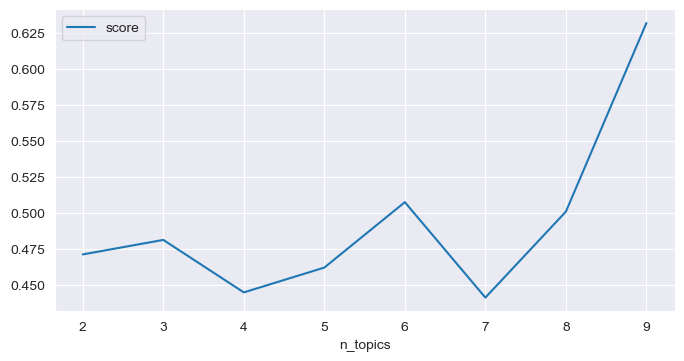

In [37]:
plot_coherence(df_lda_clusters)

It is quite tricky to choose a good cluster value based on the plot above, but we got a noticeable increase in coherence score when `n_topics = 6` while not having too high a cluster count.

In [40]:
optimal_k = 6
lda_model = build_optimal_lda(optimal_k, comments_tokenized, id2word, bow)

Coherence Score: 0.507517654203785


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0     -197.597107  137.315445       1        1  30.476728
1     -243.688583 -156.513733       2        1  13.137685
2      231.517624  -80.523956       3        1  20.576494
3       21.518539 -291.150055       4        1   3.754934
4      -18.429708  -41.319805       5        1  13.862703
5       96.092918  184.281799       6        1  18.191450, topic_info=           Term       Freq      Total Category  logprob  loglift
12        thank  15.000000  15.000000  Default  30.0000  30.0000
3      continue   1.000000   1.000000  Default  29.0000  29.0000
1         class   9.000000   9.000000  Default  28.0000  28.0000
18        could   2.000000   2.000000  Default  27.0000  27.0000
10      student   2.000000   2.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
58   understand   0.783354   7.556000   Topic6  -4.6358  -0.5623
84         feel   0.783125   2.589497   Topic6  -4.6361   0.5083
79      concept   0.783087   1.981406   Topic6  -4.6361   0.7759
104        want   0.782983   1.981420   Topic6  -4.6362   0.7758
43         make   0.781839   5.930677   Topic6  -4.6377  -0.3220

[330 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
29        1  0.505471         able
29        2  0.505471         able
30        2  0.827363  accommodate
193       3  0.761879       adjust
61        1  0.701235      advance
...     ...       ...          ...
27        5  0.821672        world
117       2  0.827342        worth
28        1  0.371648        would
28        3  0.371648        would
28        5  0.371648        would

[291 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])

In [41]:
df_representative_comments = get_most_representative_documents(comments, comments_tokenized, lda_model, bow)


----------
TOPIC 1.0
Keywords: ['thank, class, term, course, lesson, really, understand, teach, difficult, advance']

Text 16: Hello sir! I wanna start by saying thank you for this term and sorry the class was kinda dead and we had a hard time understanding things <:D I think that we learned a lot and the people who needed this class for thesis got what they came for cause we did, and I'm grateful for that, however, it was difficult to follow a lot of the lessons. I really think that if there was more class engagement, the lessons would be easier to get? Cause like you know, how other students understand the lessons is probably also how I'll understand it. Thank you so much btw for helping me throughout the term and listening to suggestions! I really hope that the next classes you teach will go better. Thank you again sir! Good luck :DDD
Text 17: Hi sir, I really enjoyed the course and learning about machine learning. Although, I did find it difficult due to the lack of python experie

Below are my interepretation of the clusters.

Cluster 1:
- students being grateful despite the difficult topics we have tackled
- Valentine's day

Cluster 2:
- instructor is accomodating and understanding

Cluster 3:
- students appreciate all the learnings
- instructor is responsive to students' concerns/feedback
- notebooks are well prepared and organized

Cluster 4:
- there is only 1 response under this cluster: instructor doing his best despite difficulties of online class

Cluster 5:
- Catch-all cluster--no obvious similarity in the feedback in this cluster

Cluster 6:
- lots of 'thank you' comments
- students being grateful despite the difficult topics we have tackled
- comments about feedback: instructor is receptive to feedback and gives constant feedback to students as well

We can see that there are overlaps between the different clusters and some of those clusters contain very few items, which is to be expected given the small sample size.

### Wordcloud

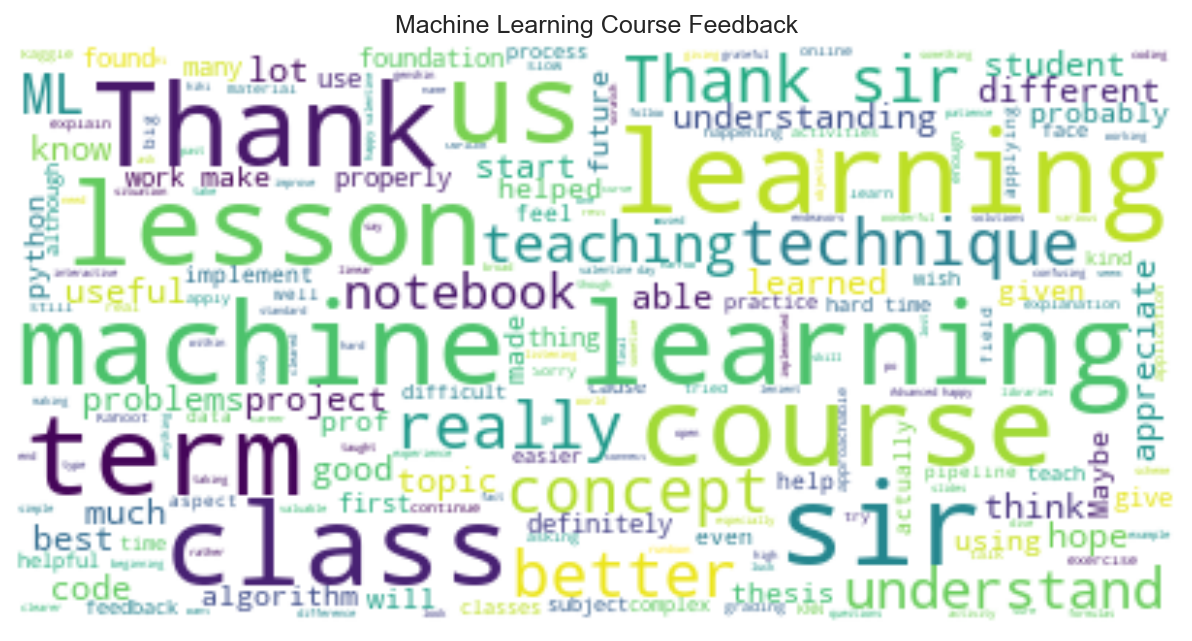

In [95]:
from wordcloud import WordCloud

fig, ax = plt.subplots(1,1, figsize=(10,10), dpi=150)

comments = []
for column in df_comments:
    comments += df_comments[column].tolist()
comments = [comment for comment in comments if type(comment)==str]
comments = ' '.join(comments)
    
wc = WordCloud(background_color="white", repeat=True, random_state=0)
wc.generate(comments)

plt.title('Machine Learning Course Feedback')
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

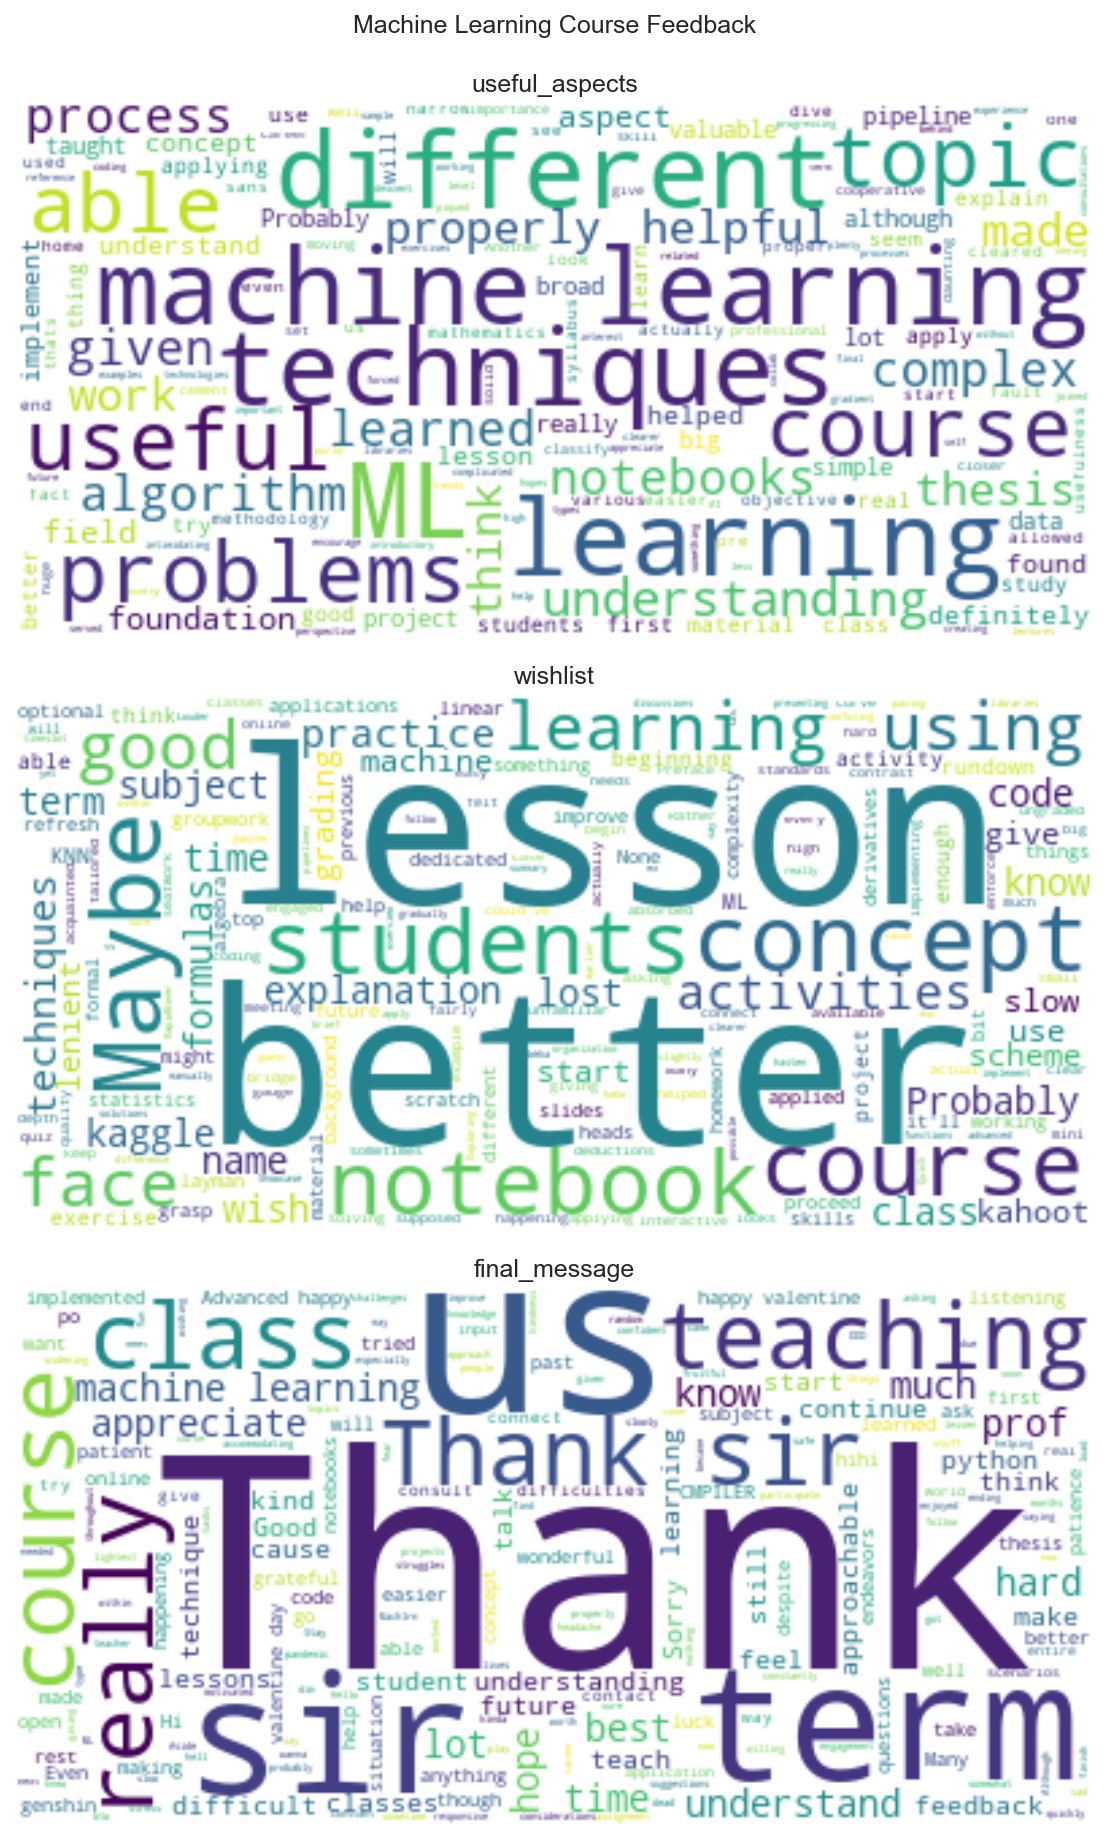

In [96]:
fig, ax = plt.subplots(3,1, figsize=(15,12), dpi=150)

for idx, column in enumerate(df_comments):
    comments = df_comments[column].tolist()
    comments = [comment for comment in comments if type(comment)==str]
    comments = ' '.join(comments)

    wc = WordCloud(background_color="white", repeat=True, random_state=0)
    wc.generate(comments)

    ax[idx].axis("off")
    ax[idx].imshow(wc, interpolation="bilinear")
    ax[idx].set_title(column)

plt.suptitle('Machine Learning Course Feedback', y=1.02)
plt.tight_layout()
plt.show()

### Favorite Messages

To end, I would like to showcase here my favorite comments:

In [42]:
df_comments['useful_aspects'][[1,9,10,13,14,16,21]].tolist()

["Probably the fact that it cleared things up about what machine learning really is and how it's not such a simple and narrow topic, but a broad and complex one at that.",
 "I think the most valuable aspect of the course was that it was able to cement a solid foundation of machine learning. Given how big the field is and how we're moving ever-closer to applying machine learning in many different fields, I think the foundations given by the course will definitely be useful and will be a huge skill set in my professional career. Another thing I found very valuable as well was that the course was able to give importance to machine learning and explain different machine learning concepts that seem very daunting and complicated at first. And although this was only an introductory course, the topics and lessons I learned over the term was definitely plenty and has further piqued my interest in the topic.",
 'Learning when or when not to use machine learning. ',
 'The collab notebooks served 

Regarding the notebooks, it actually took me more than 40 hours to develop each of them, at least for the first few topics as I had to make sure all the maths, algorithms, and codes are correct and consistent, hence the quality :)

In [43]:
df_comments['wishlist'][[2,9,14,15,20,27]].tolist()

['A heads up on what previous lessons could be applied to the subject (e.g. statistics, derivatives) and optional practice material to help the students refresh their skills.',
 "If I were to name a few things that can be improve in the course, it'll probably be the complexity of some of the lessons. Maybe it was because I had no formal background in linear algebra, but there were some lessons where I would get a bit lost into the explanations of some of the formulas different machine learning techniques would use. In the future, maybe it might be better to start of with an a top-down or a layman's explanation of those formulas or techniques to give a better grasp on what's supposed to be happening before giving a more in-depth explanation.",
 "Face-to-face classes could've been better :(",
 'At the beginning of the course, I had a hard time applying the concept to the actual code and   I was lost on how to begin coding the activity. I wish that there is a bridge on how we will be able

Yes, it would have been a lot better if it's face-to-face since we can be more interactive and I have more dimensions to utilize to effectively teach.

In [44]:
df_comments['final_message'][[4,9,11,15,19,20,22]].tolist()

["Thank you sir for teaching us the entire term! Thanks for being accommodating to us and willing to take it slow for us to slowly understand the topics. At the start I really didn't understand anything at all but now, through the projects I worked on, I was able to somewhat understand more about machine learning and how it is to be implemented. Aside from that, thank you din for being kind and open to us especially when we just talk about random stuff may it be about genshin or anything else. This really made you more approachable. Good luck in your future endeavors sir!",
 "Hi, Sir!! Thank you very much for being our prof for the past term and for teaching us a lot of new concepts and techniques within machine learning. It's sad to know that the term is quickly ending but I just want to say that I'm very grateful for the past few months and for the considerations you've given to me and the rest of the class. I really appreciate that you're constantly asking for feedback, since as a s

Thank you for the messages, class. I am very glad that you enjoyed the course despite it being a very technical one. I really tried my best to impart to you what I know in this field.

### Conclusions

As can be seen in the results earlier, there are lots of overlaps between the clusters identified by the model. Even before applying the clustering, I was not expecting great results (good clusters) due to the small sample size and few token counts for most of the responses. Another reason for which might be due to the overall similarity of the students' feedback. For instance, (1) the students being grateful for the many things they have learned and (2) the learning curve/complexity of the topics for this course are very common responses. **This is one example where Machine Learning won't perform well** *(at least with the preprocessing we have done)* due to the aforementioned reasons, and it would be a lot better to **just analyze the feedback manually by a human.** **We cannot just plug ML into something and expect to give us great results--not all things will benefit from ML.** Anyway, what I have done is far from being a comprehensive study, but this is a fun way of analyzing the students' feedback.

### Recommendations

Future iterations of this work can include different preprocessing, clustering models, and more hyperparameter optimization. The results of the clusters from merging the responses from diferent questions might also be interesting to look at. I was thinking that it may lead to having clusters based on the nature of the question, which is pointless since we already have that separation built in already. However, as we have more samples now, the clusters might be more pronouned.

## End
<sup>made by **Jude Michael Teves**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> judemichaelteves@gmail.com or jude.teves@dlsu.edu.ph</sup><br>
